### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read input file

df=pd.read_csv('footfalls.csv')
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
df.shape

(159, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

*1- We can see there are no null values in our dataset<br>
2- There is month columns which is object datatype..we need to change it to datetime type for further processing<br>*


In [5]:
# Converting Month Object datatype into Datetime datatype
df['Month']=pd.to_datetime(df['Month'],format='%b-%y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          159 non-null    datetime64[ns]
 1   Footfalls      159 non-null    int64         
 2   t              159 non-null    int64         
 3   log_footfalls  159 non-null    float64       
 4   t_square       159 non-null    int64         
 5   Jan            159 non-null    int64         
 6   Feb            159 non-null    int64         
 7   Mar            159 non-null    int64         
 8   Apr            159 non-null    int64         
 9   May            159 non-null    int64         
 10  Jun            159 non-null    int64         
 11  Jul            159 non-null    int64         
 12  Aug            159 non-null    int64         
 13  Sep            159 non-null    int64         
 14  Oct            159 non-null    int64         
 15  Nov            159 non-

In [7]:
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1991-01-01,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1991-02-01,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1991-03-01,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1991-04-01,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1991-05-01,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
df.tail()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
154,2003-11-01,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,2003-12-01,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,2004-01-01,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,2004-02-01,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0
158,2004-03-01,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
#Resamling our Date of year and month basis period
# df['Month'] = df['Month'].dt.to_period('M')
# df.head()

In [10]:
# lets make Month as Index to get analysis done based on time frame

In [11]:
df.set_index("Month",drop=True,inplace =True)

In [12]:
df.head()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,,,,,
1991-01-01,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-02-01,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
1991-03-01,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
1991-04-01,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
1991-05-01,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# for the sake of easy underatnding I am dropping months columns from table
df=df.iloc[:,0:4]
df.head()

,Footfalls,t,log_footfalls,t_square
Month,,,,
1991-01-01,1709,1,7.443664,1
1991-02-01,1621,2,7.390799,4
1991-03-01,1973,3,7.587311,9
1991-04-01,1812,4,7.502186,16
1991-05-01,1975,5,7.588324,25


# Splitting our data for Training in 70%  and 30% for testing.....

In [14]:

#splitting our data for training
train = df[:int(0.70*(len(df)))]
test = df[int(0.70*(len(df))):]


In [15]:
print(train.shape)
print(test.shape)

(111, 4)
(48, 4)


<AxesSubplot:xlabel='Month'>

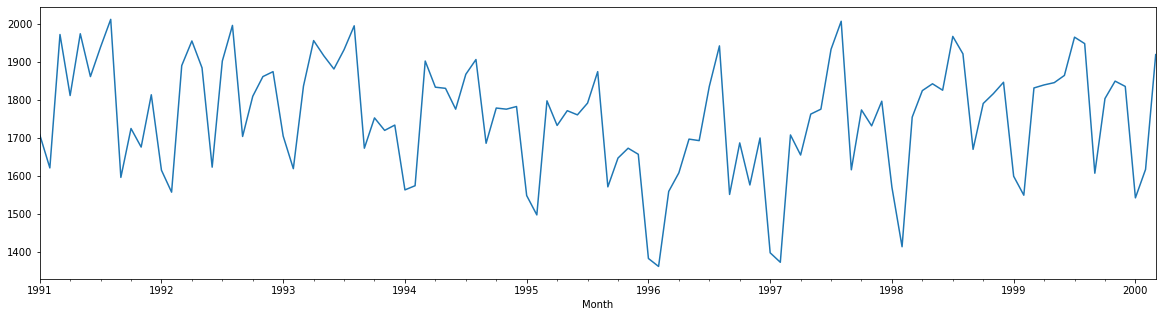

In [16]:
train.Footfalls.plot(figsize=(20,5))

<AxesSubplot:xlabel='Month'>

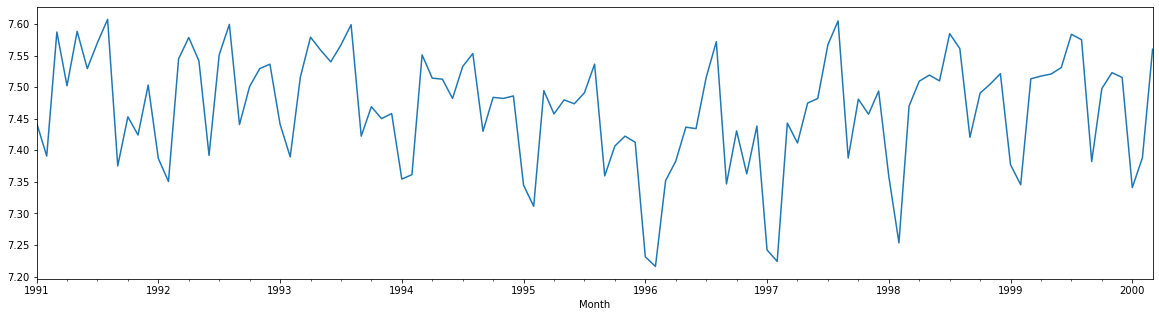

In [17]:
train.log_footfalls.plot(figsize=(20,5))

**Visual Interpreatation<br>
1- we can see above time series is not stationary as no constant mean is there<br>
2- We can see slight up and down trend in Time Series**

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd1 = seasonal_decompose(train['Footfalls'], model='additive')
sd2 = seasonal_decompose(train['Footfalls'], model='multiplicative')

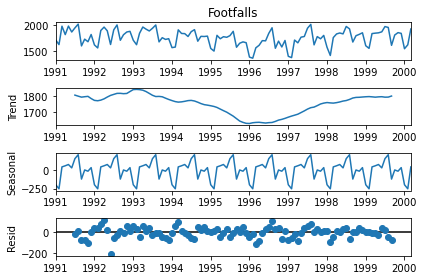

In [19]:
sd1.plot();

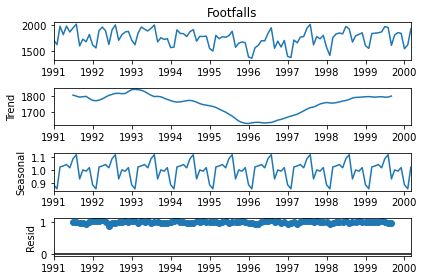

In [20]:
sd2.plot();

### We can see here there is changing trend as well as seasonality

# Rolling mean

In [21]:
# check for moving Average model
train['ma2']= train.Footfalls.rolling(window=2).mean()
train['ma3']= train.Footfalls.rolling(window=3).mean()
train.head()

,Footfalls,t,log_footfalls,t_square,ma2,ma3
Month,,,,,,
1991-01-01,1709,1,7.443664,1,NaN,NaN
1991-02-01,1621,2,7.390799,4,1665.0,NaN
1991-03-01,1973,3,7.587311,9,1797.0,1767.666667
1991-04-01,1812,4,7.502186,16,1892.5,1802.000000
1991-05-01,1975,5,7.588324,25,1893.5,1920.000000


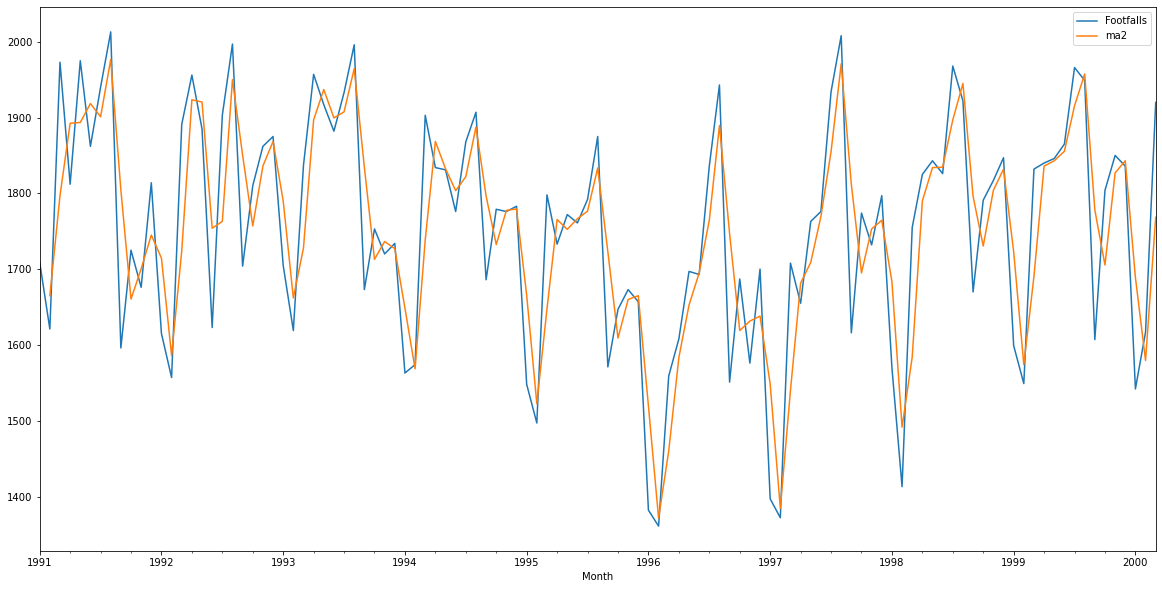

In [22]:
plt.figure(figsize=(20,10))
train.Footfalls.plot()
train.ma2.plot()
plt.legend()

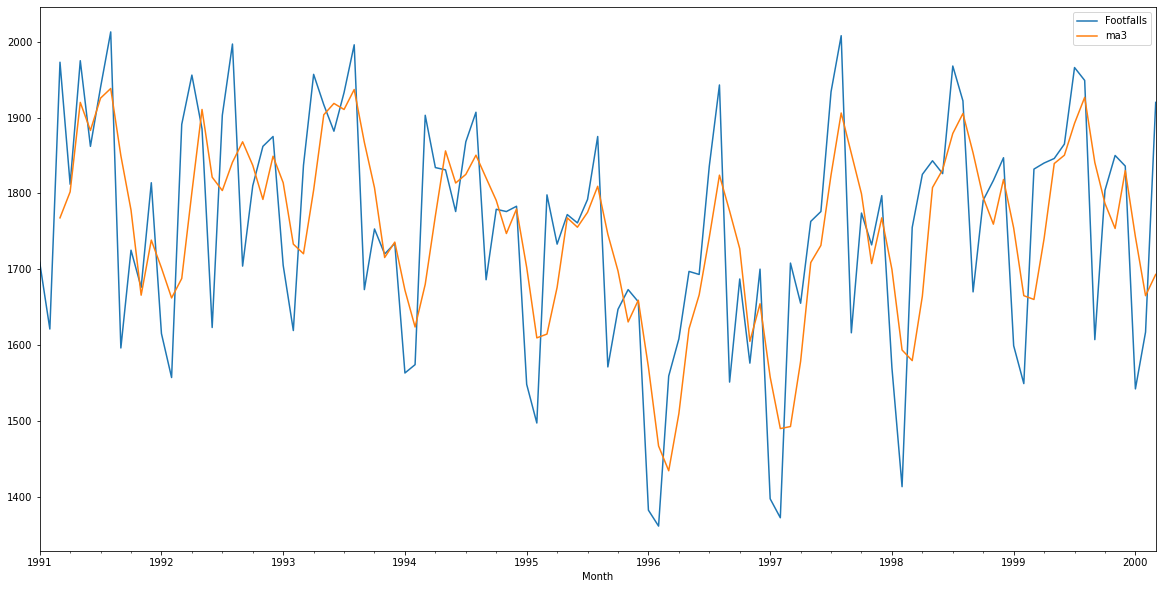

In [23]:
plt.figure(figsize=(20,10))
train.Footfalls.plot()
train.ma3.plot()
plt.legend()

# check for Stationarity

***Condition for Stationarity:<br>
    1- Constant mean: The mean of the series should be constant over time.<br>
    2- Constant variance: The variance of the series should be constant over time.<br>
   3- Constant autocorrelation: The autocorrelation between the series and lagged versions of itself should be constant over time.***

### we will check stationarity by performing dicky-fuller test on our time Series

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [26]:
adfuller_test(train.Footfalls)

ADF Test Statistic : -1.0684748438557732
p-value : 0.7274786897402189
#Lags Used : 12
Number of Observations Used : 98
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [27]:
adfuller_test(train.log_footfalls)

ADF Test Statistic : -1.0631415023133926
p-value : 0.7295446889184056
#Lags Used : 12
Number of Observations Used : 98
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


*We can see, in both cases we have found our p value for null hypothesis significant..so we fail to reject null hypothesis
So we can say our Time series is* **Non-stationary** 

# Convert our Time Series from Non-stationary to Stationary

There are several techniques that can be used to transform a non-stationary time series into a stationary one, including:

Differencing: This involves subtracting the value of the series at a previous time point from the current value. This can help remove trend and seasonality from the series, making it stationary.

Detrending: This involves fitting a trend line to the series and removing it from the data. This can help remove a long-term trend from the series, making it stationary.

Seasonal decomposition: This involves separating the series into its trend, seasonal, and residual components, and removing the trend and seasonal components from the data. This can help remove trend and seasonality from the series, making it stationary.

Log transformation: This involves taking the log of the series values. This can help stabilize the variance of the series, making it stationary.

In [28]:
## We are going to use differencing

# Differencing

In [29]:
train['Footfalls_1']= train.Footfalls- train.Footfalls.shift(1)

In [30]:
train=train[['Footfalls','Footfalls_1']].dropna()
train.head()

,Footfalls,Footfalls_1
Month,,
1991-02-01,1621,-88.0
1991-03-01,1973,352.0
1991-04-01,1812,-161.0
1991-05-01,1975,163.0
1991-06-01,1862,-113.0


In [31]:
# we aslo check seasonality as our time period conatain months and years we take differencing from it also
train['Footfalls_3']= train.Footfalls- train.Footfalls.shift(3)
train['Footfalls_6']= train.Footfalls- train.Footfalls.shift(6)

In [32]:
train.dropna(inplace=True)

In [33]:
train.shape

(104, 4)

In [34]:
# we have taken differencing between  

In [35]:
train.head(10)

,Footfalls,Footfalls_1,Footfalls_3,Footfalls_6
Month,,,,
1991-08-01,2013,73.0,38.0,392.0
1991-09-01,1596,-417.0,-266.0,-377.0
1991-10-01,1725,129.0,-215.0,-87.0
1991-11-01,1676,-49.0,-337.0,-299.0
1991-12-01,1814,138.0,218.0,-48.0
1992-01-01,1615,-199.0,-110.0,-325.0
1992-02-01,1557,-58.0,-119.0,-456.0
1992-03-01,1891,334.0,77.0,295.0
1992-04-01,1956,65.0,341.0,231.0


In [36]:
# lets check for the adafuller test
adfuller_test(train['Footfalls_1'])

ADF Test Statistic : -2.9996724464353655
p-value : 0.03492500098185463
#Lags Used : 12
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [37]:
adfuller_test(train['Footfalls_3'])

ADF Test Statistic : -3.497806778869504
p-value : 0.008043599604919903
#Lags Used : 10
Number of Observations Used : 93
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [38]:
adfuller_test(train['Footfalls_6'])

ADF Test Statistic : -3.585518992758653
p-value : 0.006043985354988166
#Lags Used : 7
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


So I can see some seasoanality here in Quarter wise Data

<AxesSubplot:xlabel='Month'>

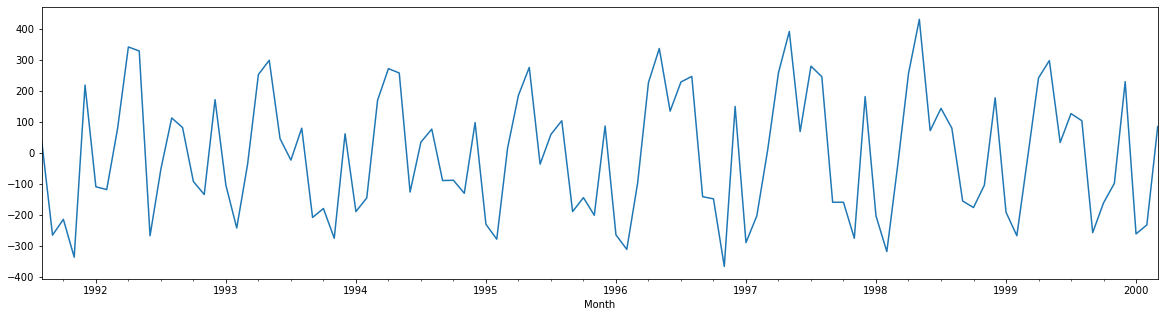

In [39]:
train['Footfalls_3'].plot(figsize=(20,5))

# Auto Regressive Model

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

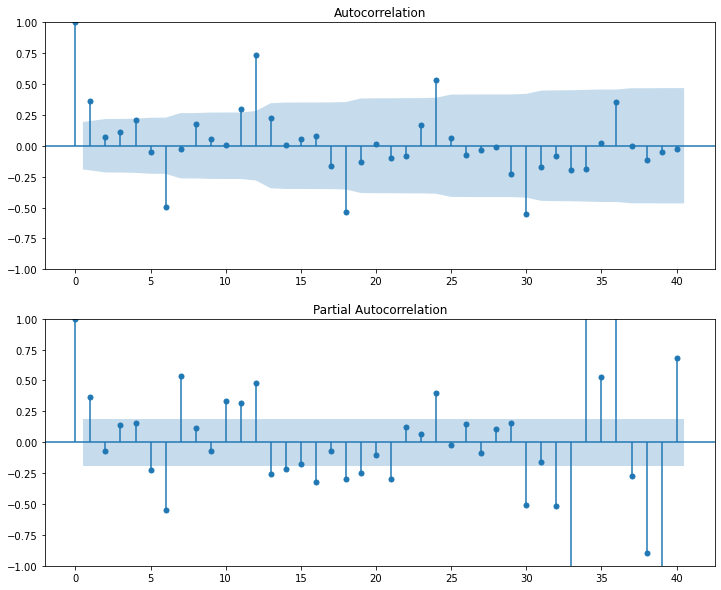

In [41]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['Footfalls'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['Footfalls'],lags=40,ax=ax2)

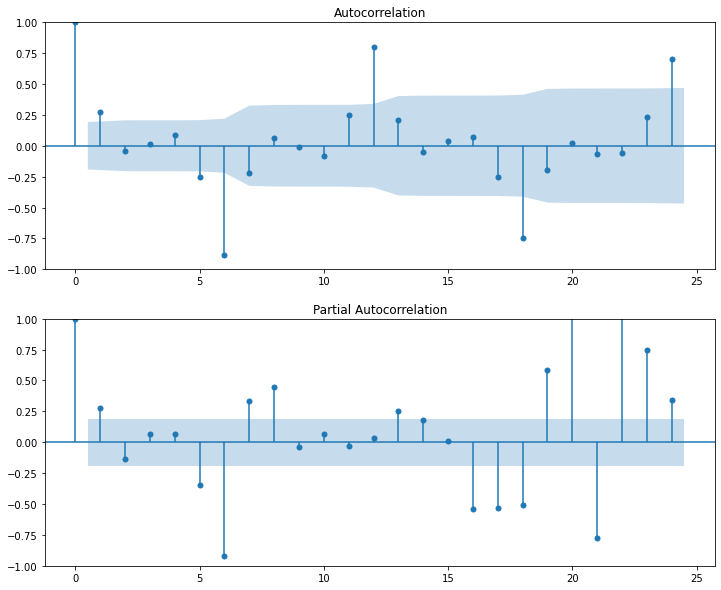

In [42]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['Footfalls_6'],lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['Footfalls_6'],lags=24,ax=ax2)

In [43]:
# we can cleary see seasonality in our graph
#lets condider our p & q values as 1 & 1 for instance
# we will use d as 1,3,6  lets see with which our data is getting fitted well

In [44]:
# For non seasonal Data
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model=ARIMA(train['Footfalls'],order=(1,1,1))

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
model2=ARIMA(train['Footfalls'],order=(1,1,0))

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_fit2=model2.fit()

In [48]:
model_fit=model.fit()

In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Footfalls   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -657.321
Date:                Fri, 06 Jan 2023   AIC                           1320.642
Time:                        17:01:32   BIC                           1328.546
Sample:                    08-01-1991   HQIC                          1323.844
                         - 03-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3536      0.092      3.830      0.000       0.173       0.534
ma.L1         -0.9547      0.039    -24.276      0.000      -1.032      -0.878
sigma2      2.021e+04   3455.265      5.848      0.000    1.34e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 5.95
Prob(Q):                              0.57   Prob(JB):                         0.05
Heteroskedasticity (H):               1.11   Skew:                            -0.47
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Footfalls   No. Observations:                  104
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -671.037
Date:                Fri, 06 Jan 2023   AIC                           1346.074
Time:                        17:01:32   BIC                           1351.344
Sample:                    08-01-1991   HQIC                          1348.208
                         - 03-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2491      0.148     -1.687      0.092      -0.538       0.040
sigma2      2.677e+04   3971.817      6.740      0.000     1.9e+04    3.46e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.48   Prob(JB):                         0.30
Heteroskedasticity (H):               1.06   Skew:                            -0.37
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# forecasting with model formed on train data
forecast = np.array(model_fit.forecast(steps = len(test)))
forecast


array([1819.0787525 , 1783.39616426, 1770.77992006, 1766.31921176,
       1764.74204519, 1764.18440855, 1763.98724573, 1763.91753513,
       1763.89288765, 1763.88417308, 1763.88109188, 1763.88000246,
       1763.87961728, 1763.87948109, 1763.87943294, 1763.87941591,
       1763.87940989, 1763.87940776, 1763.87940701, 1763.87940674,
       1763.87940665, 1763.87940662, 1763.87940661, 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ,
       1763.8794066 , 1763.8794066 , 1763.8794066 , 1763.8794066 ])

In [52]:
forecast2 = np.array(model_fit2.forecast(steps = len(test)))
forecast2

array([1844.53682119, 1863.3311821 , 1858.6503827 , 1859.81615168,
       1859.52581296, 1859.59812281, 1859.58011379, 1859.584599  ,
       1859.58348194, 1859.58376015, 1859.58369086, 1859.58370812,
       1859.58370382, 1859.58370489, 1859.58370462, 1859.58370469,
       1859.58370467, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468,
       1859.58370468, 1859.58370468, 1859.58370468, 1859.58370468])

In [53]:
forecast_1 = pd.DataFrame(forecast.reshape(-1,1),index = test.index,columns=['Prediction'])

In [54]:
forecast_2 = pd.DataFrame(forecast2.reshape(-1,1),index = test.index,columns=['Prediction2'])

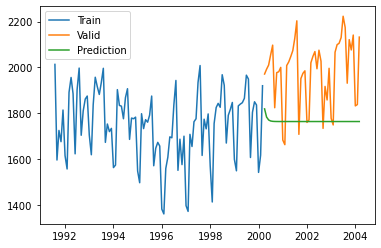

In [55]:

plt.plot(train.Footfalls, label='Train')
plt.plot(test.Footfalls, label='Valid')
plt.plot(forecast_1, label='Prediction')
plt.legend()
plt.show()

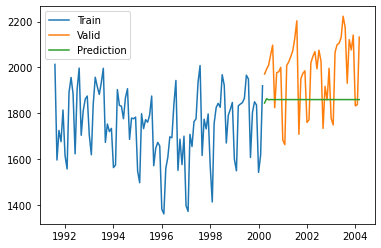

In [56]:

plt.plot(train.Footfalls, label='Train')
plt.plot(test.Footfalls, label='Valid')
plt.plot(forecast_2, label='Prediction')
plt.legend()
plt.show()

In [57]:
len(test)


48

In [58]:
len(forecast_1)

48

# Mean Squared Error
mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values
and the actual value.


In [59]:
#Importing mean squared error
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test.Footfalls,forecast_1))
print("Test RMS",rms)

Test RMS 256.7446687575735


In [60]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test.Footfalls,forecast_2))
print("Test RMS",rms)

Test RMS 185.9248016089475


We are not getting that much better prediction usinga Arima model as we have seasonal component in our model

# Check for SARIMAX

In [61]:
# In this case our model of Arima does not performing well

In [62]:
import statsmodels.api as sm

In [63]:
model=sm.tsa.statespace.SARIMAX(train['Footfalls'],order=(1, 1, 1),seasonal_order=(1,1,1,6))
results=model.fit()

C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91801\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Footfalls   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -566.700
Date:                           Fri, 06 Jan 2023   AIC                           1143.400
Time:                                   17:01:34   BIC                           1156.274
Sample:                               08-01-1991   HQIC                          1148.606
                                    - 03-01-2000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9593      0.121     -7.926      0.000      -1.196      -0.722
ma.L1          0.9999     11.727      0.085      0.932     -21.985      23.985
ar.S.L6       -0.9638      0.016    -59.048      0.000      -0.996      -0.932
ma.S.L6       -0.2310      0.122     -1.888      0.059      -0.471       0.009
sigma2      5714.1867   6.65e+04      0.086      0.932   -1.25e+05    1.36e+05
===================================================================================
Ljung-Box (L1) (Q):                  14.56   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               0.57   Skew:                            -0.13
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**We can see for Auto regression and seasonal element for 6 our p value is more significant**

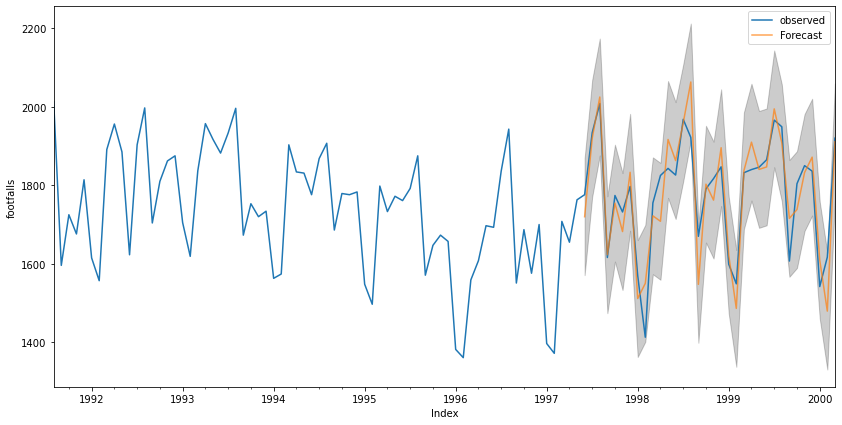

In [65]:
## Validating Forecast on Test data
pred = results.get_prediction(start=70, dynamic=False)
pred_ci = pred.conf_int()
ax = train.Footfalls.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Index')
ax.set_ylabel('footfalls')
plt.legend()


From above plot we can observe that validation of the test data with forecasting

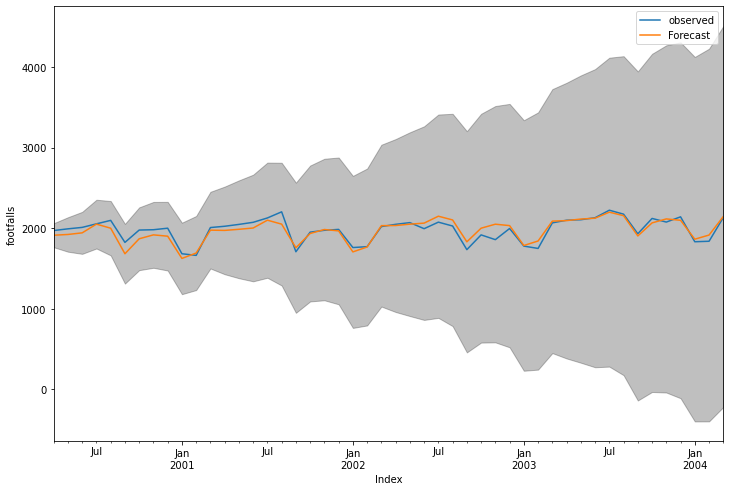

In [66]:
pred_uc = results.get_forecast(steps=len(test))
pred_ci = pred_uc.conf_int()
ax = test.Footfalls.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', figsize=(12, 8))
ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Index')
ax.set_ylabel('footfalls')
plt.legend()


In [67]:
## RMS of SARIMAX
y_forecasted = pred_uc.predicted_mean
y_truth = test.Footfalls
rms = sqrt(mean_squared_error(y_truth,y_forecasted))
print("RMS of SARIMAX ",rms)

RMS of SARIMAX  66.11008596657281


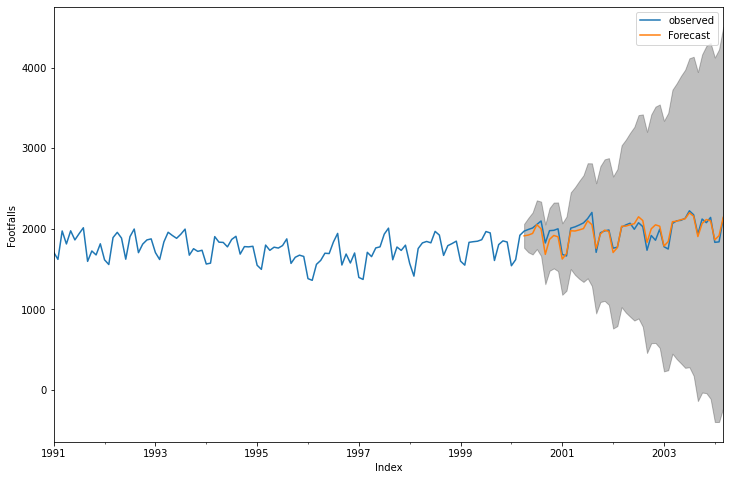

In [68]:
#predicting alcohol sales for next 12 months
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()
ax = df.Footfalls.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', figsize=(12, 8))
ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Index')
ax.set_ylabel('Footfalls')
plt.legend()


# Conclusion

###  We have used both ARIMA and SARIMAX
**For ARIMA Model we got accuracy scores as<br>
RMS of ARIMA = 185.92 <br>
For SARIMAX Model we got accuracy scores as<br>
RMS of SARIMAX = 66.11**<br>

### By considering above values we can be clear that SARIMAX accuracy scores are better than ARIMA


